In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from read_json import as_json, plot_histogram
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree

In [3]:
data_dev = pd.read_csv("resampled/develop_resampled.csv")
data_dev.head()

,@timestamp,cores,user_pct,idle_pct,system_pct,actual_used_bytes,actual_used_pct,swap_free,swap_total,free,swap,bytes_total,bytes_total_norm,swap_norm,out_bytes,out_bytes_norm,in_bytes,in_bytes_norm
0,2023-03-01 00:00:00,4,0.019750,0.954237,0.026013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350341e+10,0.016666,3.965484e+09,0.028013
1,2023-03-01 00:10:00,4,0.075925,0.866975,0.057125,6.060876e+09,0.70570,2.675782e+09,1.086207e+10,2.528043e+09,0.753658,8.588919e+09,0.130819,0.944027,NaN,NaN,NaN,NaN
2,2023-03-01 00:20:00,4,NaN,NaN,NaN,6.047541e+09,0.70415,2.672400e+09,1.086207e+10,2.541378e+09,0.753970,8.588919e+09,0.130819,0.944417,2.701281e+10,0.033340,7.933084e+09,0.056041
3,2023-03-01 00:30:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-01 00:40:00,4,0.001575,0.991387,0.007038,6.064812e+09,0.70610,2.660987e+09,1.086207e+10,2.524107e+09,0.755020,8.588919e+09,0.130819,0.945733,NaN,NaN,NaN,NaN


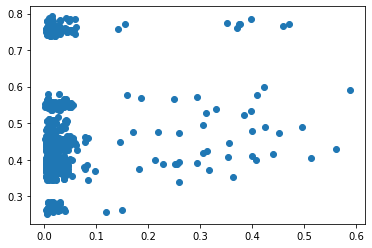

In [5]:
plt.scatter(data_dev.system_pct, data_dev.swap)

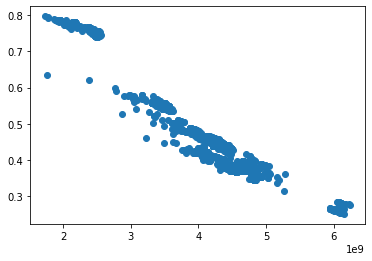

In [7]:
A = plt.scatter(data_dev.free, data_dev.swap)

In [46]:
X = np.vstack((data_dev.system_pct.to_numpy(),data_dev.swap.to_numpy())).T
X = np.delete(X, np.where(np.isnan(X)), axis=0)

array([[0.0070375 , 0.75502032],
       [0.0124875 , 0.7443989 ],
       [0.010575  , 0.73901974],
       ...,
       [0.0068375 , 0.5683276 ],
       [0.028525  , 0.57898963],
       [0.007025  , 0.57859878]])

In [47]:
nbrs = NearestNeighbors(n_neighbors=7).fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[   0,   61,  110, ...,   72,   64,  109],
       [   1,    9,   14, ...,   21,   13,   24],
       [   2,    5,    7, ...,    9,    6,   15],
       ...,
       [1263, 1135, 1136, ..., 1262, 1265, 1117],
       [1264, 1138, 1139, ..., 1009, 1265, 1113],
       [1265, 1263, 1135, ..., 1137, 1262, 1117]], dtype=int64)

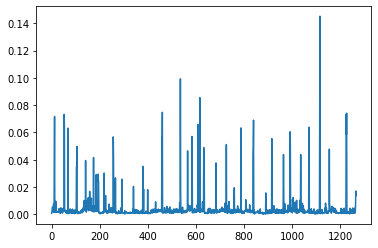

In [61]:
promedios = distances.mean(axis = 1)
plt.plot(promedios)

In [70]:
outlier_index = np.where(promedios > 0.04)
outlier_index

(array([  12,   52,   53,   68,  105,  174,  256,  257,  458,  459,  460,
         535,  565,  583,  584,  608,  616,  632,  634,  726,  787,  837,
         838,  839,  915,  963,  964,  991,  992, 1035, 1069, 1070, 1114,
        1115, 1154, 1224, 1225, 1226], dtype=int64),)

In [71]:
outlier_values = data_dev.iloc[outlier_index]

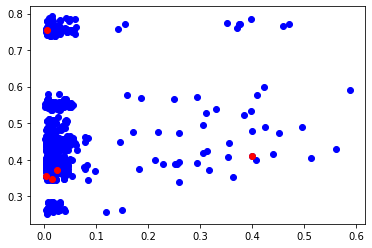

In [72]:
plt.scatter(data_dev["system_pct"], data_dev["swap"], color = "b")
# plot outlier values
plt.scatter(outlier_values["system_pct"], outlier_values["swap"], color = "r")

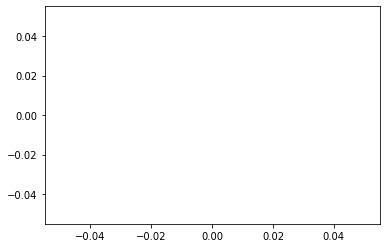

In [68]:
plt.scatter(outlier_values["system_pct"], outlier_values["swap"])